In [1]:
import os

from utils.auxiliary_func import *
from utils.plots_func import *
from flim_analysis.spatial_analysis.spatial_func import *
import config.const as const

## Define Parameters

In [2]:
patch_size = 1500
overlap = 0.75

In [3]:
DATA_PREPARATION_DIR = const.DATA_PREPARATION_DIR

FIGURE_SUPPLEMENTARY_DIR = const.FIGURE_SUPPLEMENTARY_DIR


## Check correlation between density and patch probability 

### Plot correlation density and patch probability

In [4]:
output_nuclei_count_patch_prob_path = os.path.join(DATA_PREPARATION_DIR, f'nuclei_count_and_patch_probability_{patch_size}_df.csv'
)

merged_df = pd.read_csv(output_nuclei_count_patch_prob_path)
merged_df.head()

,patient_id,leap_ID,y_true,prob_results,patch_ID,nuclei_count
0,11,15,0,0.482645,1128_1127_2628_2627,548
1,11,15,0,0.517836,1128_1502_2628_3002,410
2,11,15,0,0.466807,1128_1877_2628_3377,310
3,11,15,0,0.364429,1128_2252_2628_3752,118
4,11,15,0,0.545767,1128_2_2628_1502,5172


In [5]:

# Drop rows with missing values
df_corr = merged_df[['prob_results', 'nuclei_count']].dropna()

# Pearson correlation
pearson_corr, p_val_pearson = pearsonr(df_corr['prob_results'], df_corr['nuclei_count'])

print(f"Pearson: r = {pearson_corr:.4f}, p = {p_val_pearson:.4f}")

Pearson: r = 0.0250, p = 0.0032


Figure saved as pdf at: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/figure_results/Supplementary/CorrelationNucleusDensityPatchProbability_1500.pdf


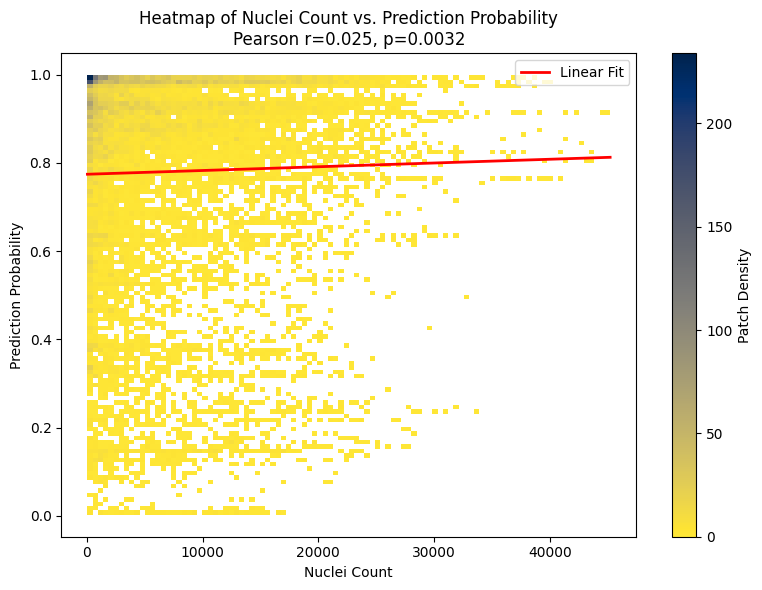

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(
    data=df_corr,
    x='nuclei_count',
    y='prob_results',
    bins=100,
    cmap='cividis_r',
    cbar=True
)

# Compute linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_corr['nuclei_count'], df_corr['prob_results'])

# Generate line values
x_vals = np.linspace(df_corr['nuclei_count'].min(), df_corr['nuclei_count'].max(), 500)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='Linear Fit', linewidth=2)

# Plot labels and legend
plt.xlabel("Nuclei Count")
plt.ylabel("Prediction Probability")
plt.title(f'Heatmap of Nuclei Count vs. Prediction Probability\n'
          f'Pearson r={pearson_corr:.3f}, p={p_val_pearson:.4f}')
plt.legend()

# Label the colorbar
cbar = ax.collections[0].colorbar
cbar.set_label("Patch Density")

plt.tight_layout()

save_file_path = FIGURE_SUPPLEMENTARY_DIR
save_file_name= f"CorrelationNucleusDensityPatchProbability_{patch_size}"
save_fig(save_file_path, save_file_name, 'pdf', plt)
plt.show()